In [1]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
import pickle

In [2]:
train_data = pd.read_pickle("train_engineered.pkl")

In [3]:
test_data = pd.read_pickle("test_engineered.pkl")

In [5]:
print(train_data.isnull().mean().to_string())

TransactionID                 0.000000
TransactionAmt                0.000000
card1                         0.000000
card2                         0.015127
card3                         0.002650
card5                         0.007212
addr1                         0.111264
addr2                         0.111264
dist1                         0.596524
dist2                         0.936284
C1                            0.000000
C3                            0.000000
C5                            0.000000
D1                            0.002149
D3                            0.445149
D4                            0.286047
D5                            0.524674
D8                            0.873123
D9                            0.873123
D10                           0.128733
D11                           0.472935
D13                           0.895093
D14                           0.894695
D15                           0.150901
M1                            0.459071
M2                       

In [30]:
def preprocess_numeric(df, numeric_cols):
    df = df.copy()

    # Compute Q1, Q3, IQR
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Prepare imputer up-front
    imputer = SimpleImputer(strategy='median')
    
    # Loop per column so we can skip bad IQRs
    for col in numeric_cols:
        col_q1 = Q1[col]
        col_q3 = Q3[col]
        col_iqr = IQR[col]

        # Skip if IQR is zero or not a number
        if pd.isna(col_iqr) or col_iqr == 0:
            continue

        # Compute bounds
        lower = col_q1 - 1.5 * col_iqr
        upper = col_q3 + 1.5 * col_iqr

        # Cap (clip) that column
        df[col] = df[col].clip(lower=lower, upper=upper)

    # After capping all valid cols, impute
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

    return df



In [14]:
list_of_columns = ['card2','card3','card5','addr','dist','^C','^(D[0-9])','^V','id']

In [15]:
columns_for_process = [train_data.filter(regex=(i)).columns.to_list() for i in list_of_columns]

In [17]:
columns_for_process

[['card2'],
 ['card3'],
 ['card5'],
 ['addr1', 'addr2'],
 ['dist1', 'dist2'],
 ['C1', 'C3', 'C5'],
 ['D1', 'D3', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11', 'D13', 'D14', 'D15'],
 ['V1',
  'V2',
  'V3',
  'V4',
  'V6',
  'V7',
  'V8',
  'V10',
  'V12',
  'V14',
  'V15',
  'V19',
  'V23',
  'V25',
  'V27',
  'V35',
  'V37',
  'V44',
  'V46',
  'V47',
  'V53',
  'V55',
  'V56',
  'V61',
  'V66',
  'V75',
  'V77',
  'V78',
  'V82',
  'V86',
  'V95',
  'V98',
  'V99',
  'V104',
  'V107',
  'V108',
  'V109',
  'V111',
  'V112',
  'V114',
  'V115',
  'V117',
  'V118',
  'V120',
  'V121',
  'V122',
  'V123',
  'V124',
  'V129',
  'V130',
  'V131',
  'V135',
  'V136',
  'V138',
  'V139',
  'V141',
  'V144',
  'V146',
  'V148',
  'V161',
  'V166',
  'V169',
  'V170',
  'V171',
  'V172',
  'V173',
  'V174',
  'V175',
  'V176',
  'V184',
  'V187',
  'V188',
  'V194',
  'V205',
  'V208',
  'V209',
  'V210',
  'V214',
  'V215',
  'V220',
  'V221',
  'V223',
  'V224',
  'V226',
  'V227',
  'V238',
  'V240

In [29]:
numeric_cols_for_train = ['card2','card3','card5','addr1','addr2','dist1','dist2','D1', 'D3', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11', 'D13', 'D14', 'D15','V1',
  'V2',
  'V3',
  'V4',
  'V6',
  'V7',
  'V8',
  'V10',
  'V12',
  'V14',
  'V15',
  'V19',
  'V23',
  'V25',
  'V27',
  'V35',
  'V37',
  'V44',
  'V46',
  'V47',
  'V53',
  'V55',
  'V56',
  'V61',
  'V66',
  'V75',
  'V77',
  'V78',
  'V82',
  'V86',
  'V95',
  'V98',
  'V99',
  'V104',
  'V107',
  'V108',
  'V109',
  'V111',
  'V112',
  'V114',
  'V115',
  'V117',
  'V118',
  'V120',
  'V121',
  'V122',
  'V123',
  'V124',
  'V129',
  'V130',
  'V131',
  'V135',
  'V136',
  'V138',
  'V139',
  'V141',
  'V144',
  'V146',
  'V148',
  'V161',
  'V166',
  'V169',
  'V170',
  'V171',
  'V172',
  'V173',
  'V174',
  'V175',
  'V176',
  'V184',
  'V187',
  'V188',
  'V194',
  'V205',
  'V208',
  'V209',
  'V210',
  'V214',
  'V215',
  'V220',
  'V221',
  'V223',
  'V224',
  'V226',
  'V227',
  'V238',
  'V240',
  'V241',
  'V250',
  'V260',
  'V270',
  'V281',
  'V282',
  'V283',
  'V284',
  'V286',
  'V288',
  'V290',
  'V291',
  'V300',
  'V305',
  'V313',
  'V314',
  'id_01',                        
  'id_02',                         
  'id_03',                         
  'id_04',                         
  'id_05',                        
  'id_06',                      
  'id_07',                         
  'id_08',                      
  'id_09',                       
  'id_10',                         
  'id_11',                         
  'id_13',                         
  'id_14',                         
  'id_17',                         
  'id_18',                         
  'id_19',                         
  'id_20',                         
  'id_21',                         
  'id_22',                         
  'id_24',                         
  'id_25',                         
  'id_26',                         
  'id_32',                         
  'id_34',                         
  'id_30_val',                     
 'id_31_val',                     
'id_33_val',
'P_emaildomain_val',            
'R_emaildomain_val']

In [31]:
train_data2 = preprocess_numeric(train_data,numeric_cols_for_train)

In [33]:
train_data2.shape

(590540, 222)

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score,roc_auc_score,average_precision_score,f1_score

In [40]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score

In [41]:
def model_results(X_train, y_train, X_test, y_test, model):
    # Fit the training model to the training set
    model.fit(X_train, y_train)
    
    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    
    # Print the accuracy and roc_auc_score performance metric
    print("Accuracy: ", accuracy_score(y_test, predicted))
    print("AUC: ", roc_auc_score(y_test, probs[:,1]))
    print("-----")
    # Print the classification report and confusion matrix
    print (ConfusionMatrixDisplay.from_predictions(y_test, predicted))
    print (classification_report(y_test, predicted))

In [42]:
def stratified_kfold_results(X, y, model, n_splits=5):
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    accuracies = []
    aucs = []
    f1_scores = []
    pr_auc_scores = []
    
    fold = 1
    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        probs = model.predict_proba(X_val_fold)[:, 1]
        
        acc = accuracy_score(y_val_fold, preds)
        auc = roc_auc_score(y_val_fold, probs)
        f1 = f1_score(y_val_fold, preds)
        pr_auc = average_precision_score(y_val_fold,probs)
        
        accuracies.append(acc)
        aucs.append(auc)
        f1_scores.append(f1)
        pr_auc_scores.append(pr_auc)

        print(f"--- Fold {fold} ---")
        print(f"Accuracy: {acc:.4f}")
        print(f"ROC-AUC:  {auc:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"PR-AUC: {pr_auc:.4f}")
        print(classification_report(y_val_fold, preds))
        fold += 1

    print("========== AVERAGED METRICS ==========")
    print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
    print(f"Mean ROC-AUC:  {np.mean(aucs):.4f}")
    print(f"Mean F1-score: {np.mean(f1_scores):.4f}")
    print(f"Mean PR_AUC_score: {np.mean(pr_auc_scores):.4f}")


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X = train_data2.drop('isFraud',axis=1)

In [45]:
y = train_data2['isFraud']

In [47]:
random_forest = RandomForestClassifier(n_estimators=128,random_state=101)

In [48]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

Accuracy:  0.9801029566159786
AUC:  0.9396990393365967
-----
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113957
           1       0.95      0.46      0.62      4151

    accuracy                           0.98    118108
   macro avg       0.97      0.73      0.80    118108
weighted avg       0.98      0.98      0.98    118108



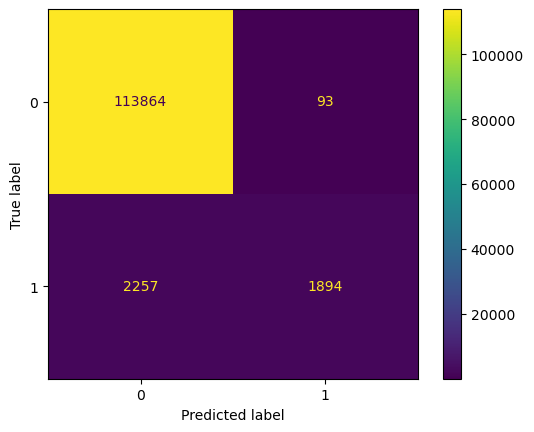

In [49]:
model_results(X_train,y_train,X_test,y_test,random_forest)

In [50]:
rf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=101,n_jobs=-1)

In [51]:
stratified_kfold_results(X_train,y_train,rf,n_splits=5)

--- Fold 1 ---
Accuracy: 0.9789
ROC-AUC:  0.9402
F1-score: 0.5783
PR-AUC: 0.7448
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     91184
           1       0.96      0.41      0.58      3303

    accuracy                           0.98     94487
   macro avg       0.97      0.71      0.78     94487
weighted avg       0.98      0.98      0.97     94487

--- Fold 2 ---
Accuracy: 0.9794
ROC-AUC:  0.9374
F1-score: 0.5897
PR-AUC: 0.7428
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     91184
           1       0.97      0.42      0.59      3303

    accuracy                           0.98     94487
   macro avg       0.98      0.71      0.79     94487
weighted avg       0.98      0.98      0.98     94487

--- Fold 3 ---
Accuracy: 0.9788
ROC-AUC:  0.9364
F1-score: 0.5741
PR-AUC: 0.7357
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     

In [52]:
from xgboost import XGBClassifier

In [53]:
xg = XGBClassifier(n_estimators=128, max_depth=2, learning_rate=1, objective='binary:logistic',random_state=101)

Accuracy:  0.9744725166796492
AUC:  0.880006049947536
-----
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113957
           1       0.80      0.36      0.50      4151

    accuracy                           0.97    118108
   macro avg       0.89      0.68      0.74    118108
weighted avg       0.97      0.97      0.97    118108



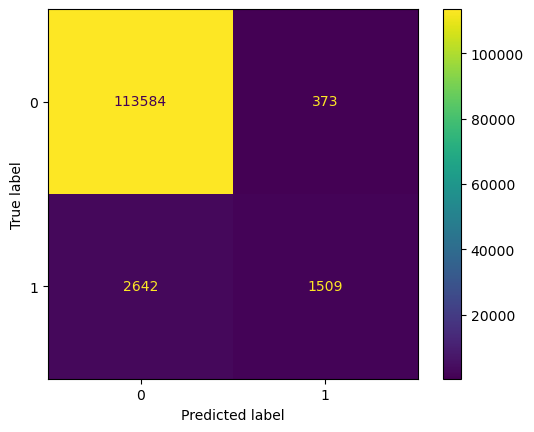

In [54]:
model_results(X_train, y_train, X_test, y_test,xg)

In [55]:
neg_count = y.value_counts()[0] 
pos_count = y.value_counts()[1] 
scale_pos_weight_value = neg_count / pos_count 

In [56]:
XGB_model = XGBClassifier(n_estimators=200, 
                          max_depth=5, 
                          learning_rate=0.1, 
                          objective='binary:logistic',
                          subsample=0.8,
                          colsample_bytree=0.8,
                          gamma=0.1,
                          n_jobs=-1,
                          use_label_encoder=False,
                          eval_metric='logloss',
                          scale_pos_weight=scale_pos_weight_value,
                          random_state=101)

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [57]:
stratified_kfold_results(X, y, XGB_model, n_splits=5)

--- Fold 1 ---
Accuracy: 0.8852
ROC-AUC:  0.9222
F1-score: 0.3279
PR-AUC: 0.6025
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    113976
           1       0.21      0.80      0.33      4132

    accuracy                           0.89    118108
   macro avg       0.60      0.84      0.63    118108
weighted avg       0.96      0.89      0.92    118108

--- Fold 2 ---
Accuracy: 0.8835
ROC-AUC:  0.9247
F1-score: 0.3281
PR-AUC: 0.6081
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    113976
           1       0.21      0.81      0.33      4132

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91    118108

--- Fold 3 ---
Accuracy: 0.8869
ROC-AUC:  0.9222
F1-score: 0.3303
PR-AUC: 0.6076
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    1

In [58]:
import lightgbm as lgb

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [59]:
def clean_column_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
    return df

In [60]:
lgb_model = lgb.LGBMClassifier(objective='binary',n_estimators=128,learning_rate=0.1,num_leaves=31,is_unbalance=True)

In [61]:
X_cleaned = clean_column_names(train_data2)

In [62]:
X_1 = X_cleaned.drop('isFraud',axis=1)

In [63]:
y_1 = X_cleaned['isFraud']

In [64]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_1,y_1,test_size=0.2, random_state=101)

Accuracy:  0.8745724252379178
AUC:  0.9278441871806464
-----
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113957
           1       0.19      0.82      0.31      4151

    accuracy                           0.87    118108
   macro avg       0.59      0.85      0.62    118108
weighted avg       0.96      0.87      0.91    118108



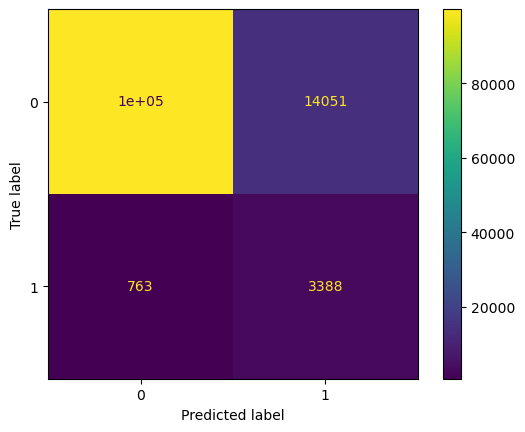

In [65]:
model_results(X_train_cleaned, y_train_cleaned, X_test_cleaned, y_test_cleaned,lgb_model)

In [66]:
lgb_model_kfold = lgb.LGBMClassifier(objective='binary',n_estimators=128,learning_rate=0.1,num_leaves=31,is_unbalance=True,max_depth=6)

In [67]:
stratified_kfold_results(X_1, y_1, lgb_model_kfold, n_splits=5)

--- Fold 1 ---
Accuracy: 0.8723
ROC-AUC:  0.9150
F1-score: 0.3027
PR-AUC: 0.5853
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113976
           1       0.19      0.79      0.30      4132

    accuracy                           0.87    118108
   macro avg       0.59      0.83      0.62    118108
weighted avg       0.96      0.87      0.91    118108

--- Fold 2 ---
Accuracy: 0.8728
ROC-AUC:  0.9180
F1-score: 0.3067
PR-AUC: 0.5870
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113976
           1       0.19      0.80      0.31      4132

    accuracy                           0.87    118108
   macro avg       0.59      0.84      0.62    118108
weighted avg       0.96      0.87      0.91    118108

--- Fold 3 ---
Accuracy: 0.8762
ROC-AUC:  0.9151
F1-score: 0.3101
PR-AUC: 0.5862
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    1